<font size="6"> AI 724 - Statistical Techniques for Spatio-Temporal Data
Analysis</center>          
<br>


<font size="5">   <center> Lecture 3 : Time series preprocessing and Time series Decomposition</center>          
<br>


In this exercise we shall carryout Time series preprocessing ad time series decomposition. 
The dataset used is the Airline passenger dataset

***Load the required libraries***

# Ordinary Krigging and heat map generation for Geospatial data

In [ ]:


Processing TURF.xls

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
# import folium
# rom folium import plugins
%matplotlib inline

### Read the data 
# df=pd.read_csv("data.csv")
# df.head(3)

In [9]:


df = pd.read_csv('Turf.csv')
df.head()
     


,Sensor,Date,Time,Ground Temp,Salinity,Dielectric,Moisture,Latitude,Longtitude,Type
0,G1A0000333_18GFC,July 12th 2021,11:59 AM,8 °C,0.3 dS/m,9 V/m,18%,-41.138691,175.020691,NaN
1,G1A0000338_18GBL,July 12th 2021,12:02 PM,7 °C,0.5 dS/m,7 V/m,15%,-41.139042,175.020737,NaN
2,G1A0000345_ 17GBC,July 12th 2021,12:02 PM,7 °C,0.3 dS/m,7 V/m,15%,-41.135422,175.024002,NaN
3,G1A0000347_ 13GBL,July 12th 2021,12:05 PM,8 °C,0.5 dS/m,7 V/m,15%,-41.137749,175.017578,Creeping Bentgrass
4,G1A0000353_ 2GFC,July 12th 2021,12:00 PM,7 °C,0.6 dS/m,12 V/m,24%,-41.139885,175.012894,Creeping Bentgrass


In [ ]:
from pykrige.ok import OrdinaryKriging
import numpy as np

# Define data points
x = [0.0, 2.0, 1.0, 3.0]
y = [0.0, 0.0, 2.0, 1.0]
z = [10.0, 20.0, 30.0, 40.0]

# Define grid
gridx = np.arange(0.0, 3.0, 0.5)
gridy = np.arange(0.0, 2.0, 0.5)

# Perform ordinary kriging
OK = OrdinaryKriging(x, y, z, variogram_model='linear')
z_interp, sigma = OK.execute('grid', gridx, gridy)

# Print results
print(z_interp)

In [10]:


lats=df['Latitude']
lons=df['Longtitude']

In [11]:
df['Moisture'] = [int(s.replace("%", "")) for s in df['Moisture']]

In [13]:
val = df['Moisture']

In [12]:
df.head(6)

,Sensor,Date,Time,Ground Temp,Salinity,Dielectric,Moisture,Latitude,Longtitude,Type
0,G1A0000333_18GFC,July 12th 2021,11:59 AM,8 °C,0.3 dS/m,9 V/m,18,-41.138691,175.020691,NaN
1,G1A0000338_18GBL,July 12th 2021,12:02 PM,7 °C,0.5 dS/m,7 V/m,15,-41.139042,175.020737,NaN
2,G1A0000345_ 17GBC,July 12th 2021,12:02 PM,7 °C,0.3 dS/m,7 V/m,15,-41.135422,175.024002,NaN
3,G1A0000347_ 13GBL,July 12th 2021,12:05 PM,8 °C,0.5 dS/m,7 V/m,15,-41.137749,175.017578,Creeping Bentgrass
4,G1A0000353_ 2GFC,July 12th 2021,12:00 PM,7 °C,0.6 dS/m,12 V/m,24,-41.139885,175.012894,Creeping Bentgrass
5,G1A0000354_16GBR,July 12th 2021,12:04 PM,7 °C,0.6 dS/m,8 V/m,16,-41.131798,175.023636,Creeping Bentgrass


In [15]:
# Define the grid on which to interpolate
grid_lon = np.linspace(min(lons), max(lons), 100)
grid_lat = np.linspace(min(lats), max(lats), 100)

In [17]:
OK = OrdinaryKriging(lons, lats, val, variogram_model='linear',
                     verbose=False, enable_plotting=False)

In [18]:

# Interpolate the grid
z, ss = OK.execute('grid', grid_lon, grid_lat)

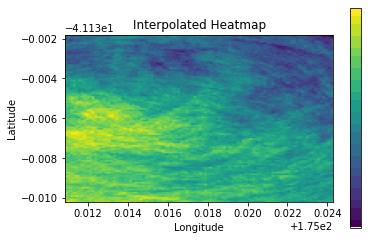

In [19]:
import matplotlib.pyplot as plt

# Create a heatmap of the interpolated values
plt.imshow(z.T, origin='lower', extent=[min(grid_lon), max(grid_lon), min(grid_lat), max(grid_lat)])
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Interpolated Heatmap')
plt.show()

In the imshow function call  z.T refers to the transpose of the interpolated values z.

The reason for transposing z is that the imshow function expects the input to be in row-major order, while OrdinaryKriging.execute returns the interpolated values in column-major order. Transposing z flips the rows and columns, so that the values are in the correct order for imshow.

By specifying origin='lower' in the imshow function call, we're indicating that the (0, 0) coordinate should be located at the bottom-left corner of the plot. This is a common convention for plotting two-dimensional arrays, with the first index (i.e., the row number) corresponding to the y-axis, and the second index (i.e., the column number) corresponding to the x-axis.

In [20]:
z

masked_array(
  data=[[17.833333333333435, 17.833333333333425, 17.833333333333425, ...,
         17.833333333333353, 17.833333333333357, 17.83333333333336],
        [17.833333333333442, 17.833333333333425, 17.833333333333417, ...,
         17.833333333333353, 17.833333333333353, 17.833333333333357],
        [17.83333333333343, 17.83333333333344, 17.833333333333417, ...,
         17.83333333333335, 17.83333333333335, 17.833333333333353],
        ...,
        [17.833333333333396, 17.833333333333393, 17.833333333333382, ...,
         17.83333333333333, 17.83333333333332, 17.833333333333314],
        [17.833333333333396, 17.83333333333339, 17.833333333333393, ...,
         17.83333333333333, 17.833333333333318, 17.83333333333331],
        [17.8333333333334, 17.83333333333339, 17.83333333333339, ...,
         17.83333333333332, 17.833333333333307, 17.833333333333318]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [

In [21]:
print(z)

[[17.833333333333435 17.833333333333425 17.833333333333425 ...
  17.833333333333353 17.833333333333357 17.83333333333336]
 [17.833333333333442 17.833333333333425 17.833333333333417 ...
  17.833333333333353 17.833333333333353 17.833333333333357]
 [17.83333333333343 17.83333333333344 17.833333333333417 ...
  17.83333333333335 17.83333333333335 17.833333333333353]
 ...
 [17.833333333333396 17.833333333333393 17.833333333333382 ...
  17.83333333333333 17.83333333333332 17.833333333333314]
 [17.833333333333396 17.83333333333339 17.833333333333393 ...
  17.83333333333333 17.833333333333318 17.83333333333331]
 [17.8333333333334 17.83333333333339 17.83333333333339 ...
  17.83333333333332 17.833333333333307 17.833333333333318]]


In [31]:
from pyproj import Proj

In [42]:
import numpy as np
from pykrige import variogram_models
from pyproj import Proj, transform

# Define the spatial coordinates and observed values
lons = np.array([-122.4194, -122.4195, -122.4197, -122.4198])
lats = np.array([37.7749, 37.7748, 37.7747, 37.7746])
z = np.array([10.0, 15.0, 20.0, 25.0])

# Define the input and output projections
in_proj = Proj(proj='latlong', datum='WGS84')
out_proj = Proj(proj='utm', zone='10', datum='WGS84')

# Convert the lat-lon coordinates to UTM meters
x, y = transform(in_proj, out_proj, lons, lats)

# Compute the pairwise distances and differences in observed values
distances = np.sqrt((x[:, np.newaxis] - x) ** 2 + (y[:, np.newaxis] - y) ** 2)
differences = np.abs(z[:, np.newaxis] - z)

# Use the 'linear' model to fit the experimental variogram
maxlag = distances.max()
model = variogram_models.linear_variogram_model(distances.ravel(), differences.ravel(), maxlag=maxlag)

/home/iiitb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  from ipykernel import kernelapp as app


TypeError: linear_variogram_model() got an unexpected keyword argument 'maxlag'

To generate a variogram from latlog data, it is generally recommended to convert the coordinates into meters. The reason for this is that the variogram measures the spatial autocorrelation between data points, which depends on the distance between them. Using latlog coordinates directly in the variogram calculation can lead to incorrect results because the distance between two latlog coordinates is not constant and depends on their location on the Earth's surface.

Therefore, it is important to convert the latlog coordinates to a metric coordinate system, such as the Universal Transverse Mercator (UTM) system or a projected coordinate system, which allows for consistent distance measurements between data points. Once the latlog data has been transformed into a metric coordinate system, the variogram can be calculated using the distance between data points in meters.

In [ ]:
z, ss = OK.execute('grid', grid_lon, grid_lat)

In [ ]:
from pykrige.uk import UniversalKriging


In [ ]:
"""
Universal Kriging Example
=========================
In this example we apply a regional linear trend to the kriging system.
"""

import matplotlib.pyplot as plt
import numpy as np

from pykrige.uk import UniversalKriging

data = np.array(
    [
        [0.3, 1.2, 0.47],
        [1.9, 0.6, 0.56],
        [1.1, 3.2, 0.74],
        [3.3, 4.4, 1.47],
        [4.7, 3.8, 1.74],
    ]
)

gridx = np.arange(0.0, 5.5, 0.5)
gridy = np.arange(0.0, 5.5, 0.5)

###############################################################################
# Create the universal kriging object. Required inputs are the X-coordinates of
# the data points, the Y-coordinates of the data points, and the Z-values of the
# data points. Variogram is handled as in the ordinary kriging case.
# drift_terms is a list of the drift terms to include; currently supported terms
# are 'regional_linear', 'point_log', and 'external_Z'. Refer to
# UniversalKriging.__doc__ for more information.

UK = UniversalKriging(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    variogram_model="linear",
    drift_terms=["regional_linear"],
)

###############################################################################
# Creates the kriged grid and the variance grid. Allows for kriging on a rectangular
# grid of points, on a masked rectangular grid of points, or with arbitrary points.
# (See UniversalKriging.__doc__ for more information.)

z, ss = UK.execute("grid", gridx, gridy)
plt.imshow(z)
plt.show()

In [ ]:
# -*- coding: utf-8 -*-
"""
Geometric example
=================
A small example script showing the usage of the 'geographic' coordinates type
for ordinary kriging on a sphere.
"""

import numpy as np
from matplotlib import pyplot as plt

from pykrige.ok import OrdinaryKriging

# Make this example reproducible:
np.random.seed(89239413)

# Generate random data following a uniform spatial distribution
# of nodes and a uniform distribution of values in the interval
# [2.0, 5.5]:
N = 7
lon = 360.0 * np.random.random(N)
lat = 180.0 / np.pi * np.arcsin(2 * np.random.random(N) - 1)
z = 3.5 * np.random.rand(N) + 2.0

# Generate a regular grid with 60° longitude and 30° latitude steps:
grid_lon = np.linspace(0.0, 360.0, 7)
grid_lat = np.linspace(-90.0, 90.0, 7)

# Create ordinary kriging object:
OK = OrdinaryKriging(
    lon,
    lat,
    z,
    variogram_model="linear",
    verbose=False,
    enable_plotting=False,
    coordinates_type="geographic",
)

# Execute on grid:
z1, ss1 = OK.execute("grid", grid_lon, grid_lat)

# Create ordinary kriging object ignoring curvature:
OK = OrdinaryKriging(
    lon, lat, z, variogram_model="linear", verbose=False, enable_plotting=False
)

# Execute on grid:
z2, ss2 = OK.execute("grid", grid_lon, grid_lat)

###############################################################################
# Print data at equator (last longitude index will show periodicity):

print("Original data:")
print("Longitude:", lon.astype(int))
print("Latitude: ", lat.astype(int))
print("z:        ", np.array_str(z, precision=2))
print("\nKrige at 60° latitude:\n======================")
print("Longitude:", grid_lon)
print("Value:    ", np.array_str(z1[5, :], precision=2))
print("Sigma²:   ", np.array_str(ss1[5, :], precision=2))
print("\nIgnoring curvature:\n=====================")
print("Value:    ", np.array_str(z2[5, :], precision=2))
print("Sigma²:   ", np.array_str(ss2[5, :], precision=2))

###############################################################################
# We can see that the data point at longitude 122, latitude 50 correctly
# dominates the kriged results, since it is the closest node in spherical
# distance metric, as longitude differences scale with cos(latitude).
# When kriging using longitude / latitude linearly, the value for grid points
# with longitude values further away as longitude is now incorrectly
# weighted equally as latitude.

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(z1, extent=[0, 360, -90, 90], origin="lower")
ax1.set_title("geo-coordinates")
ax2.imshow(z2, extent=[0, 360, -90, 90], origin="lower")
ax2.set_title("non geo-coordinates")
plt.show()

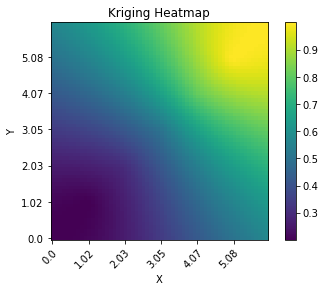

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pykrige import OrdinaryKriging

# Define your x, y, and z data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 5])
z = np.array([0.2, 0.3, 0.5, 0.8, 1.0])

# Define the grid of points at which to estimate values
gridx = np.linspace(0, 6, 60)
gridy = np.linspace(0, 6, 60)

# Create the kriging object
OK = OrdinaryKriging(x, y, z, variogram_model='linear',
                     verbose=False, enable_plotting=False)

# Estimate the values at the grid points
z_interp, sigmasq = OK.execute('grid', gridx, gridy)

# Generate heatmap
fig, ax = plt.subplots()
im = ax.imshow(z_interp, cmap='viridis', origin='lower')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Add title and labels
ax.set_title('Kriging Heatmap')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Define ticks and tick labels
xticks = np.arange(0, 60, 10)
yticks = np.arange(0, 60, 10)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(np.round(gridx[xticks], 2))
ax.set_yticklabels(np.round(gridy[yticks], 2))

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Show the plot
plt.show()

In [2]:
import numpy as np
from pykrige.ok import OrdinaryKriging
from pykrige.uk import UniversalKriging
from pykrige.rk import RegressionKriging

In [3]:
# Define your x, y, and z data (where x is longitude and y is latitude)
x = np.array([-79.3832, -79.3997, -79.4161, -79.4326, -79.449, -79.4654])
y = np.array([43.6532, 43.6532, 43.6532, 43.6532, 43.6532, 43.6532])
z = np.array([10, 12, 8, 15, 7, 9])

In [4]:
# Define the grid of points at which to estimate values
grid_lon = np.linspace(x.min(), x.max(), 100)
grid_lat = np.linspace(y.min(), y.max(), 100)
grid_lon, grid_lat = np.meshgrid(grid_lon, grid_lat)
# grid_z = None  # This will be filled with the interpolated values

In [5]:
# Create the kriging object
OK = OrdinaryKriging(x, y, z, variogram_model='linear',
                     verbose=False, enable_plotting=False)

In [ ]:
# Estimate the values at the grid points
grid_z, _ = OK.execute('grid', grid_lon, grid_lat)

In [ ]:
import numpy as np
from pykrige.ok import OrdinaryKriging
from pykrige.uk import UniversalKriging
from pykrige.rk import RegressionKriging

# Define your x, y, and z data (where x is longitude and y is latitude)
x = np.array([-79.3832, -79.3997, -79.4161, -79.4326, -79.449, -79.4654])
y = np.array([43.6532, 43.6532, 43.6532, 43.6532, 43.6532, 43.6532])
z = np.array([10, 12, 8, 15, 7, 9])

# Define the grid of points at which to estimate values
grid_lon = np.linspace(x.min(), x.max(), 100)
grid_lat = np.linspace(y.min(), y.max(), 100)
grid_lon, grid_lat = np.meshgrid(grid_lon, grid_lat)
grid_z = None  # This will be filled with the interpolated values

# Create the kriging object
OK = OrdinaryKriging(x, y, z, variogram_model='linear',
                     verbose=False, enable_plotting=False)

# Estimate the values at the grid points
grid_z, _ = OK.execute('grid', grid_lon, grid_lat)

# Reshape the interpolated values to match the shape of the grid
grid_z = grid_z.reshape(grid_lon.shape)

# Display the interpolated values using matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im = ax.imshow(grid_z, cmap='viridis', origin='lower')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Add title and labels
ax.set_title('Kriging Heatmap')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Define ticks and tick labels
xticks = np.linspace(x.min(), x.max(), 5)
yticks = np.linspace(y.min(), y.max(), 5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)

# Show the plot
plt.show()

In [ ]:
from pykrige.core import Universal, _get_variogram_func


In [ ]:
from pykrige.uk import UniversalKriging
from pykrige.core import Universal, _get_variogram_func
import numpy as np

# Define data points
x = [0.0, 2.0, 1.0, 3.0]
y = [0.0, 0.0, 2.0, 1.0]
z = [10.0, 20.0, 30.0, 40.0]

# Define grid
gridx = np.arange(0.0, 3.0, 0.5)
gridy = np.arange(0.0, 2.0, 0.5)

# Define variogram model
variogram_model = 'linear'
variogram_function = _get_variogram_func(variogram_model)
variogram_parameters = Universal.variogram_model_parameters(variogram_model, x, y, z)

# Perform universal kriging
UK = UniversalKriging(x, y, z, variogram_model=variogram_model, variogram_parameters=variogram_parameters)
z_interp, sigma = UK.execute('grid', gridx, gridy)

# Print results
print(z_interp)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

***Set the appropriate directories***

In [ ]:
!pwd

In [ ]:
os.getcwd()

***Load the dataset***

In [ ]:
os.chdir('/home/iiitb/Teaching/ST2DA/code/time-series-forecasting-airline-passenger-traffic-main')

In [ ]:
data = pd.read_csv('airline-passenger-traffic.csv', header=None)
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.head()

In [ ]:
data.describe()

# New heading

# Time Series Analysis

## Plot time series data

In [ ]:
data.plot(figsize=(12,4))

## Handling missing values

### Mean imputation

In [ ]:
#data = data.assign(Passengers_zero_imputation = data['Passengers'].fillna(data['Passengers'].(0))))
# data['Passengers_zero_imputation'].plot(figsize=(12,4))
zero_impute = pd.DataFrame(data)
# zero_impute = data['Passengers']

In [ ]:
zero_impute.describe()

In [ ]:
zero_impute.isnull().values.any()

In [ ]:
zero_impute.isnull().sum().sum()

In [ ]:
print(zero_impute.head())

In [ ]:
list(zero_impute.columns)

In [ ]:
zero_impute['Passengers'] = zero_impute['Passengers'].fillna(0)

In [ ]:

#zero_impute['Passengers'].fillna(0)
zero_impute['Passengers'].plot(figsize=(12,4))

In [ ]:
data = data.assign(Passengers_Mean_imputation = data['Passengers'].fillna(data['Passengers'].mean()))
data['Passengers_Mean_imputation'].plot(figsize=(12,4))


##### Problem:-
Replace the missing value with the mean of the remaining values
It can be observed that 1952 takes higher values than expected.
and 1960 takes lower value than expected.

### Linear interpolation
Fit a straight line to  the next and previous points of the missing values in the data.

In [ ]:
data = data.assign(Passengers_Linear_Interpolation = data['Passengers'].interpolate(method='linear'))
data.head()

In [ ]:
data['Passengers_Linear_Interpolation'].plot(figsize=(12,4))

We shal go with the linear interpolation for imputing missing values.

## Outlier detection

### Box plot and interquartile range

In [ ]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(data['Passengers'], whis=1.5)

#### whis=1.5

1st quartile = 180

3rd quartile = 360

Quartile range = (3rd quartile - 1st quartile) = 360-180 = 180

***Whisker on the upper side***

3rd quartile + (Quartile range * whis) = 360 + (180 * 1.5) = 360 + 270 = 630

There is no outliers above the whisker 630.

***Whisker on th lower side***

1st quartile - (Quartile range * whis) = 180 - (180 * 1.5) = -90

There is no outliers on the negative side of the lower whisker.

In [ ]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(data['Passengers'], whis=1)

#### whis=1

1st quartile = 180

3rd quartile = 360

Quartile range = (3rd quartile - 1st quartile) = 360-180 = 180

***Whisker on the upper side***

3rd quartile + (Quartile range * whis) = 360 + (180 * 1) = 360 + 180 = 540

There are 4 outliers above the whisker 540.


#### Conclusion for selecting whis = 1.5

So from the above analysis of whis 1 and 1.5, we should select the whis=1.5 quartile range. Because we don't want to miss any of the data in this time series analysis.

### Histogram plot

In [ ]:
data['Passengers'].hist(figsize=(12,4))

1. It can be observed that the frequency of the number of passengern are continious. 
2. As the number of passengers increases, the frequency of that number of passengers decreases. However they are not outliers

##### Conclusion
There is no outliers detected.

#### Dropping redundant columns
1. Dropping Passengers_Mean_imputation and Passengers columns since mean imputation did not help
2. Renaming the Passengers_Linear_Interpolation column to Passengers column for further processing

We will only work with the Linear interpolation imputation.

In [ ]:
data.head()

In [ ]:
data = data.drop(['Passengers', 'Passengers_Mean_imputation'], axis=1)

In [ ]:
data.rename(columns={'Passengers_Linear_Interpolation' : 'Passengers'}, inplace=True)

In [ ]:
data.head()

## Time series decomposition

### Additive seasonal decomposition

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data['Passengers'], model='additive')
fig = decomposition.plot()
plt.show()

An additive trend indicates a linear trend, and an additive seasonality indicates 
the same frequency (width) and amplitude (height) of seasonal cycles.

#### Analysis:-
1. ***Observed*** - Actual data
2. ***Trend*** - Increasing or decreasing trend.
3. ***Seasonal*** - 
    - Varies from +50 to -50 with the mean 0. 
    - Each cycle represents each year trend.
    - The value in the Y-axis has to be `added` to the Trend plot value to get the actual value of that year. E.g.:- For the year 1950 Nov, the seasonal value is +50 and the trend value is 100. Hence, teh actual value(passengers number) will (seasonal+Trend) value = 50+100 = 150.
4. ***Residual*** - It is the noise pattern of the time series data for each year, which was not captured by the two components - Trend and Seasonality. Residual is the left over after decomposition of the two major components (Trend and Seasonality)


### Multiplicative seasonal decomposition

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data['Passengers'], model='multiplicative')
fig = decomposition.plot()
plt.show()

A multiplicative trend indicates a non-linear trend (curved trend line), and a multiplicative seasonality indicates increasing/decreasing
frequency (width) and/or amplitude (height) of seasonal cycles.

#### Analysis:-

***Seasonal*** - 
1. Varies from 0.8 to 1.2 
2. The value in the Y-axis has to be `multiplied` to the Trend plot value to get the actual value of that year. E.g.:- For the year 1950 Nov, the seasonal value is `1.2` and the trend value is `100`. Hence, the actual value(passengers number) will (seasonal X Trend) value = 1.2 X 100 = 120.


Ref:
    https://github.com/sahidul-shaikh/time-series-forecasting-airline-passenger-traffic

    https://medium.com/enjoy-algorithm/pre-processing-of-time-series-data-c50f8a3e7a98

In [45]:
import numpy as np
import skgstat as skg
from pyproj import Proj, transform

# Define the spatial coordinates and observed values
lons = np.array([-122.4194, -122.4195, -122.4197, -122.4198])
lats = np.array([37.7749, 37.7748, 37.7747, 37.7746])
z = np.array([10.0, 15.0, 20.0, 25.0])

# Define the input and output projections
in_proj = Proj(proj='latlong', datum='WGS84')
out_proj = Proj(proj='utm', zone='10', datum='WGS84')

# Convert the lat-lon coordinates to UTM meters
x, y = transform(in_proj, out_proj, lons, lats)

# Compute the pairwise distances and differences in observed values
distances = np.sqrt((x[:, np.newaxis] - x) ** 2 + (y[:, np.newaxis] - y) ** 2)
differences = np.abs(z[:, np.newaxis] - z)

# Compute the empirical variogram
emp_variogram = skg.Variogram(coordinates=np.column_stack((x, y)), values=z, normalize=False, maxlag=distances.max())

# Fit a linear model to the empirical variogram
model = skg.Whittle(dim=2)
model.fit(emp_variogram.lags, emp_variogram.experimental)

# Print the model parameters
print(model)

/home/iiitb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  from ipykernel import kernelapp as app


AttributeError: module 'skgstat' has no attribute 'Whittle'